# 1. Import Libraries


**Let us import the required libraries.**

In [120]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows=None

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import variance_inflation_factor from statsmodel to perform multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# 2. Data Preparation & Exploration

#### Read the dataset and print the first five observations.

In [4]:
path='/content/drive/MyDrive/df_final1/diabetes.xlsx'

df=pd.read_excel(path)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


**we will make a copy of this dataframe, so that original dataframe 'df' is not altered**

In [5]:
df1=df.copy()

**Let us now see the number of variables and observations in the data.**

In [6]:
df1.shape

(768, 9)

**Interpretation:** The data has 768 observations and 9 Features.

**Get a concise summary of the DataFrame.**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Interpretation:** by looking at the datatypes of columns, we can say that all the variables have correct data type and no null values present in the dataset.Here Target variable is `Outcome` which tells whether person is diabetic or not, 1 means diabetic and 0 means non-diabetic.

In [8]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

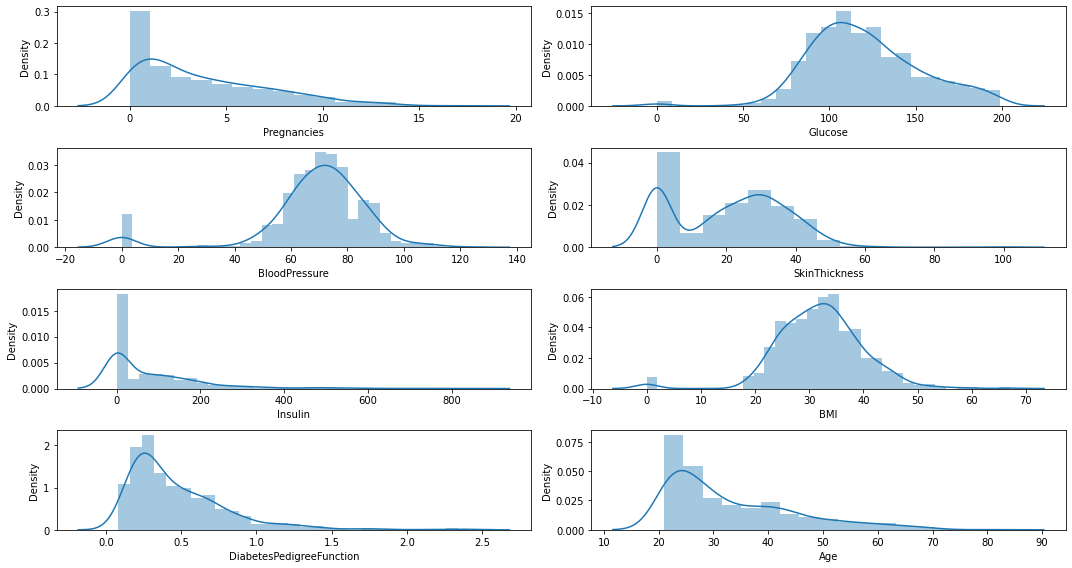

In [36]:
plt.figure(figsize=[15,8])

for i in range(1, 9):
    plt.subplot(4, 2, i)
    sns.distplot(a=df1[df1.columns[i-1]])

plt.tight_layout()

plt.show()

In [61]:
df1.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [64]:
df1=df1[df1['Age']<=70]

In [65]:
len(df1)

766

In [66]:
len(df1[df1['BloodPressure']==0])

34

In [70]:
df1['BloodPressure']=df1['BloodPressure'].replace({0:np.median(df1['BloodPressure'])})

In [73]:
df1['BloodPressure'].skew()

0.14210068121114353

In [74]:
df1['BMI']=df1['BMI'].replace({0:np.median(df1['BMI'])})

In [75]:
df1['BMI'].skew()

0.6041350088851118

In [76]:
df1['Glucose']=df1['Glucose'].replace({0:np.median(df1['Glucose'])})

In [77]:
df1['Insulin']=df1['Insulin'].replace({0:np.median(df1['Insulin'])})

In [84]:
df1['SkinThickness']=df1['SkinThickness'].replace({0:np.median(df1['SkinThickness'])})

In [78]:
len(df1)

766

In [79]:
df1.skew()

Pregnancies                0.904551
Glucose                    0.536234
BloodPressure              0.142101
SkinThickness              0.109902
Insulin                    2.688871
BMI                        0.604135
DiabetesPedigreeFunction   1.924313
Age                        1.079137
Outcome                    0.630808
dtype: float64

In [88]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.840731,121.643603,72.385117,27.332898,94.781332,32.476240,0.471422,33.127937,0.349869
std,3.368165,30.474627,12.112295,9.237471,105.652517,6.864520,0.331505,11.563152,0.477240
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,23.000000,30.500000,27.600000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,127.750000,36.600000,0.625500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


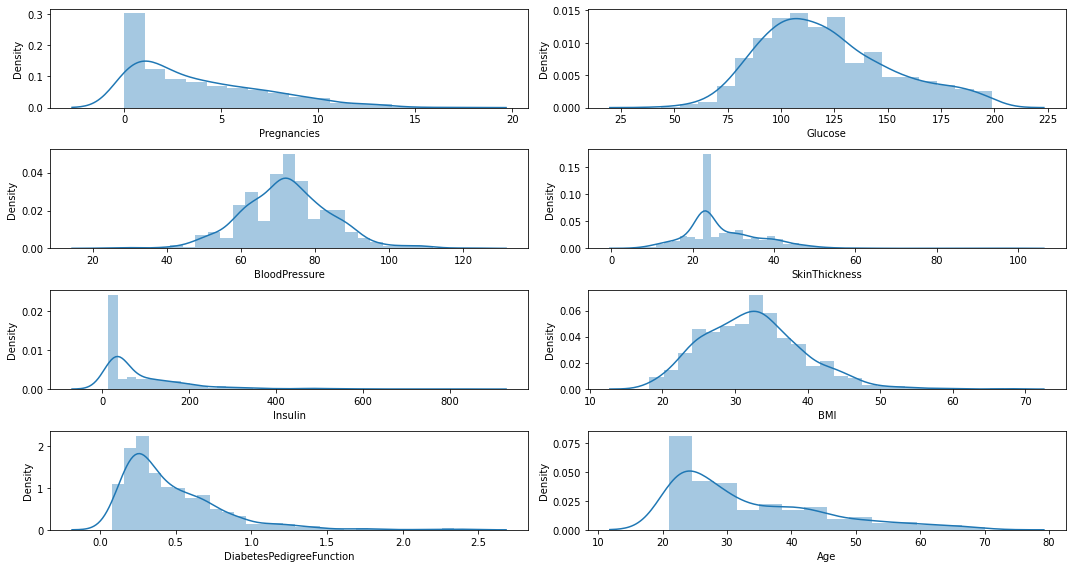

In [89]:
plt.figure(figsize=[15,8])

for i in range(1, 9):
    plt.subplot(4, 2, i)
    sns.distplot(a=df1[df1.columns[i-1]])

plt.tight_layout()

plt.show()

In [94]:
X=df1.drop('Outcome',axis=1)
y=df1['Outcome']

In [99]:
X_transformed=X.copy()

X_transformed['Pregnancies']=np.sqrt(X_transformed['Pregnancies'])

X_transformed[['Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=np.log(X_transformed[['Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [100]:
X_transformed.skew()

Pregnancies                -0.158233
Glucose                    -0.062696
BloodPressure               0.142101
SkinThickness              -0.290051
Insulin                     0.748493
BMI                        -0.050612
DiabetesPedigreeFunction    0.117900
Age                         0.584495
dtype: float64

In [101]:
df1.duplicated().sum()

0

In [105]:
X_transformed1=X_transformed.copy()

In [106]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(X_transformed1.values, i) for i in range(X_transformed1.shape[1])]

# create a column of variable names
vif["Features"] = X_transformed1.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,347.216753,BMI
1,314.060065,Glucose
2,180.647424,Age
3,142.964539,SkinThickness
4,45.092966,BloodPressure
5,29.452859,Insulin
6,5.639592,Pregnancies
7,3.272115,DiabetesPedigreeFunction


In [107]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(X_transformed1.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(X_transformed1.values, i) for i in range(X_transformed1.shape[1])]

    # create a column of variable names
    vif["Features"] = X_transformed1.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        X_transformed1 = X_transformed1.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor                  Features
0    3.510234               Pregnancies
1    4.355494                   Insulin
2    2.781493  DiabetesPedigreeFunction


In [109]:
# scale the independent numeric
X_transformed = X_transformed.apply(lambda rec: (rec - rec.mean()) / rec.std())

X_transformed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.766196,0.908532,-0.031796,0.900399,-0.833062,0.266390,0.767060,1.455236
1,-0.704110,-1.309804,-0.527160,0.340055,-0.833062,-0.844783,-0.133086,-0.039073
2,1.150575,1.757663,-0.692281,-0.350650,-0.833062,-1.474810,0.874601,0.060171
3,-0.704110,-1.125856,-0.527160,-0.350650,0.479761,-0.583853,-1.285564,-1.256515
4,-1.718472,0.599594,-2.673739,0.900399,1.157033,1.450728,2.775519,0.156361


In [116]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.20, random_state = 10,stratify=y)

In [117]:
# train data shape

print('independent variables train data shape:',X_train.shape)

print('target variables train data shape:',y_train.shape)

# test data shape

print('independent variables test data shape:',X_test.shape)

print('target variables test data shape:',y_test.shape)


independent variables train data shape: (612, 8)
target variables train data shape: (612,)
independent variables test data shape: (154, 8)
target variables test data shape: (154,)


In [118]:
y_test.value_counts(normalize=True)

0   0.649351
1   0.350649
Name: Outcome, dtype: float64

In [119]:
y_train.value_counts(normalize=True)

0   0.650327
1   0.349673
Name: Outcome, dtype: float64

## 3. Model Building

### A. Logistic Regression (Full Model)

In [121]:
# instantiate the model 
logreg = LogisticRegression()

             
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred_test=logreg.predict(X_test)

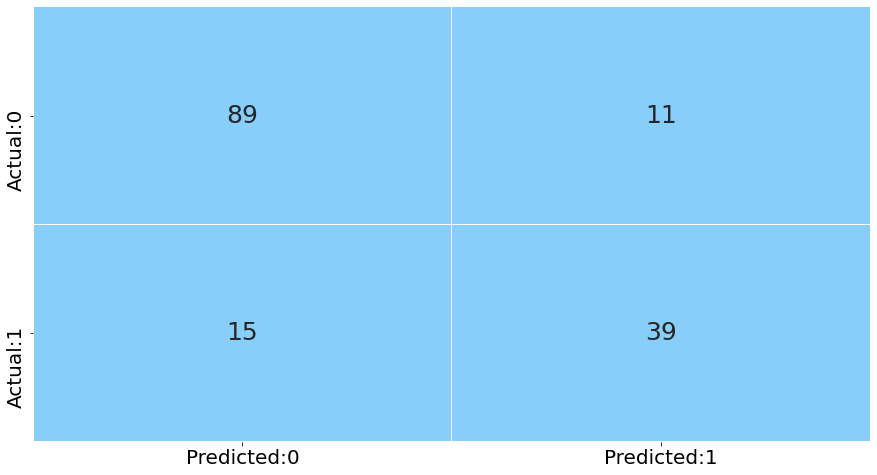

In [122]:
plt.figure(figsize=[15,8])

# confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred_test)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cnf_matrix,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [123]:
# calculate various performance measures using classification report

acc_table = classification_report(y_test, y_pred_test)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       100
           1       0.78      0.72      0.75        54

    accuracy                           0.83       154
   macro avg       0.82      0.81      0.81       154
weighted avg       0.83      0.83      0.83       154



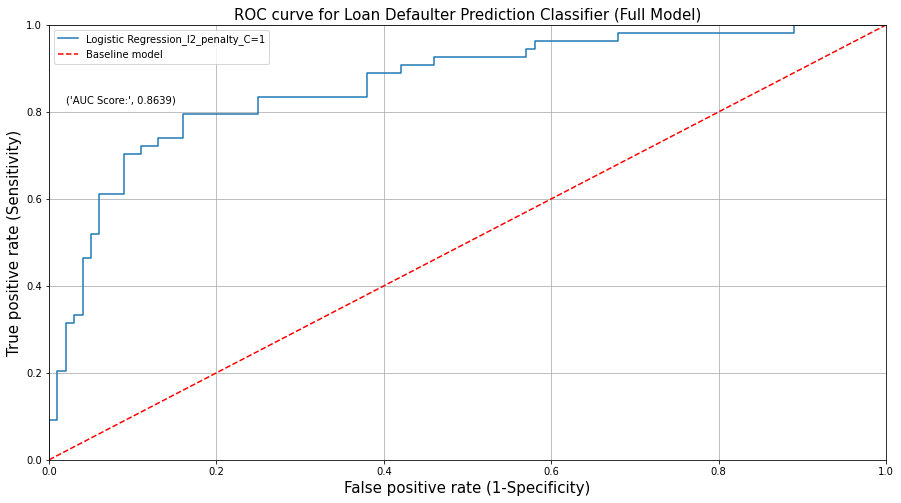

In [124]:
# Roc curve

plt.figure(figsize=[15,8])

y_pred_test_proba = logreg.predict_proba(X_test)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Logistic Regression_l2_penalty_C=1')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_test_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [125]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.796296,0.160000,0.429000,0.636296
1,0.703704,0.090000,0.556431,0.613704
2,0.722222,0.110000,0.519079,0.612222
3,0.740741,0.130000,0.481478,0.610741
4,0.703704,0.110000,0.519934,0.593704


In [126]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_test_youden = [ 0 if x < 0.429 else 1 for x in y_pred_test_proba]

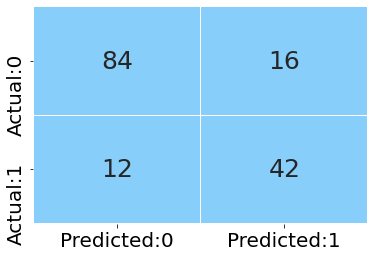

In [127]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_test_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [128]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_test_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.72      0.78      0.75        54

    accuracy                           0.82       154
   macro avg       0.80      0.81      0.80       154
weighted avg       0.82      0.82      0.82       154



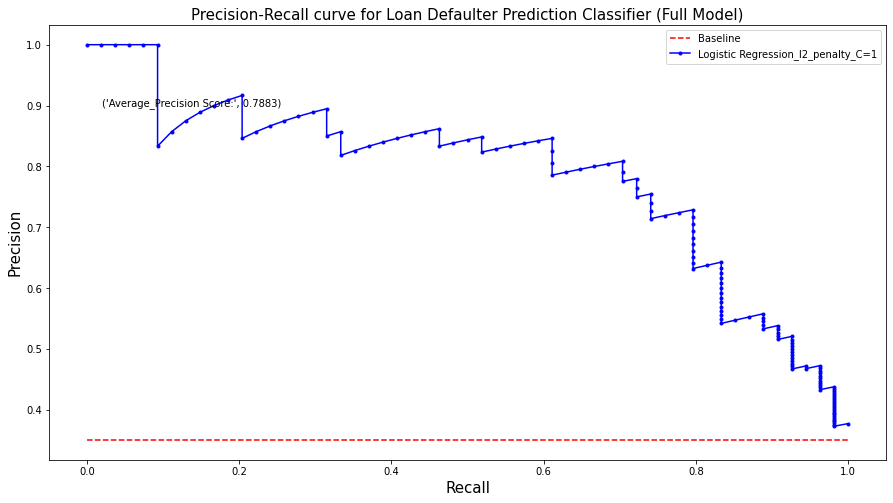

In [129]:
# precision recall curve

plt.figure(figsize=[15,8])

lr_precision, lr_recall, threshold = precision_recall_curve(y_test,y_pred_test_proba)

lr_f1, lr_auc = f1_score(y_test, y_pred_test), auc(lr_recall, lr_precision)

# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
Baseline = len(y_test[y_test==1]) / len(y_test)

plt.plot([0, 1], [Baseline,Baseline], linestyle='--', label='Baseline',color='r')

plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression_l2_penalty_C=1',color='b')

average_precision = average_precision_score(y_test, y_pred_test_proba)

#print('Average precision-recall score:'
#      ,average_precision)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the average precision score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('Average_Precision Score:', round(average_precision,4)))

# axis labels
plt.title('Precision-Recall curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('Recall',fontsize = 15)
plt.ylabel('Precision',fontsize = 15)

# show the legend
plt.legend()

# show the plot
plt.show()

### Cross Validation

In [130]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing logistic regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the 'f1_weighted' for imbalanced classification dataset
skf=StratifiedKFold(n_splits=5,shuffle=True, random_state=10)

scores = cross_val_score(estimator = LogisticRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = skf,scoring='roc_auc')

In [131]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Bias Error: ", round(1-np.mean(scores), 4))

print("Variance Error: ", round(np.std(scores,ddof=1), 4))

All scores:  [0.90319767 0.86395349 0.84662938 0.77185752 0.77142857]

Minimum score obtained:  0.7714
Maximum score obtained:  0.9032
Bias Error:  0.1686
Variance Error:  0.0583
